<a href="https://colab.research.google.com/github/Barleysack/tensor101/blob/Project_2/Reconstruct_to_image_RU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import tensorboard
import matplotlib as mpl
import matplotlib.pyplot as plt

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255

X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_train_reshaped=tf.reshape(X_train,(55000,784))
X_valid_reshaped=tf.reshape(X_valid,(5000,784))
X_test_reshaped=tf.reshape(X_test,(10000,784))

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reshaped)
X_valid_scaled = scaler.transform(X_valid_reshaped)
X_test_scaled = scaler.transform(X_test_reshaped)



class ResidualBlock(keras.layers.Layer):
    def __init__(self, n_layers, n_neurons, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [keras.layers.Dense(n_neurons, activation="elu",
                                          kernel_initializer="he_normal")
                       for _ in range(n_layers)]

    def call(self, inputs):
        Z = inputs
        for layer in self.hidden:
            Z = layer(Z)
        return inputs + Z


X_new_scaled = X_test_scaled


block1 = ResidualBlock(2, 60)
model = keras.models.Sequential([
    keras.layers.Dense(60, activation="elu", kernel_initializer="he_normal"),
    block1, block1, block1, block1,block1,
    ResidualBlock(2, 60),
    keras.layers.Dense(1)
])
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")
callback=tensorboard_callback
model.compile(loss="mse", optimizer="nadam")
history = model.fit(X_train_scaled, y_train, epochs=30 ,callbacks=callback)
  


Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 3.3901
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 1.4121
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 1.0171
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5774
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5322
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4446
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3947
Epoch 8/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2932
Epoch 9/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2827
Epoch 10/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2247
Epoch 11/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1983
Epoch 12/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1851
E

In [39]:

def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")


In [40]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

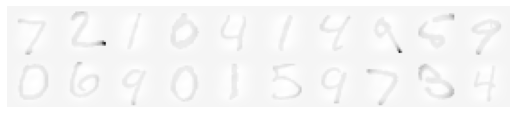

In [41]:
y_predict=model.predict(X_test_scaled)
plt.figure(figsize=(9,9))
example_images = X_test_scaled[:20]
plot_digits(example_images, images_per_row=10)

plt.show()

In [42]:
print(y_predict[:20].shape)
y_reshaped=tf.reshape(y_predict[:20],(1,20))

(20, 1)


In [43]:
tf.math.round(y_reshaped[:2])

<tf.Tensor: shape=(1, 20), dtype=float32, numpy=
array([[7., 2., 1., 0., 4., 1., 4., 9., 6., 9., 0., 6., 9., 0., 1., 5.,
        9., 7., 7., 4.]], dtype=float32)>